## Double Porosity Test
**This test is taken from MLU examples.**

In [1]:
%matplotlib inline
from ttim import *
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

Set basic parameters for the model:

In [2]:
H = 400 #aquifer thickness [m]
Q = 3093.12 #constant pumping rate [m^3/d]

Load data:

In [3]:
#Pumped well UE-25b#1
data1 = np.loadtxt('data/double-porosity-pumpingwell.txt', skiprows = 1)
t1 = data1[:, 0]
h1 = data1[:, 1]

#Observation well UE-25a#1
data2 = np.loadtxt('data/double-porosity-110m.txt', skiprows = 1)
t2 = data2[:, 0]
h2 = data2[:, 1]
r = 110 #distance from obs to pumped well

Create conceptual model:

In [4]:
km = 0.1 / H #hydraulic conductivity of matrix calculated by K&dR
Sm = 3.85e-4 #specific storage of matrix calculated by

In [5]:
ml = ModelMaq(kaq=[km, 1], z=[0, -400, -401, -801], c=5, Saq=[Sm, 1e-3],\
              Sll=0, topboundary='conf', tmin=1e-5, tmax=3)
w = Well(ml, xw=0, yw=0, rw=0.11, rc=0, tsandQ=[0, 3093.12], layers=1)
ml.solve()

self.neq  1
solution complete


Calibrate with two datasets simultaneously:

In [6]:
ca = Calibrate(ml)
ca.set_parameter(name='kaq1', initial=10)
ca.set_parameter(name='Saq1', initial=1e-4, pmin=0)
ca.set_parameter(name='c1', initial=10)
ca.set_parameter_by_reference(name='rc', parameter=w.rc, initial=0)
ca.series(name='UE-25b#1', x=0, y=0, t=t1, h=h1, layer=1)
ca.series(name='UE-25a#1', x=110, y=0, t=t2, h=h2, layer=1)
ca.fit(report=True)
display(ca.parameters)
print('RMSE:', ca.rmse())

...............................................................................................................................................................................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 204
    # data points      = 138
    # variables        = 4
    chi-square         = 5.47351448
    reduced chi-square = 0.04084712
    Akaike info crit   = -437.371923
    Bayesian info crit = -425.662908
[[Variables]]
    kaq1:  0.87697420 +/- 0.00699008 (0.80%) (init = 10)
    Saq1:  5.0872e-06 +/- 5.0669e-07 (9.96%) (init = 0.0001)
    c1:    13.0062814 +/- 1.59753939 (12.28%) (init = 10)
    rc:    0.10560388 +/- 0.00320828 (3.04%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(kaq1, c1)   =  0.858
    C(kaq1, Saq1) = -0.731
    C(Saq1, c1)   = -0.546
    C(Saq1, rc)   = -0.401
    C(kaq1, rc)   =  0.101


,optimal,std,perc_std,pmin,pmax,initial,parray
kaq1,0.876974,6.990084e-03,0.797068,-inf,inf,10,[0.8769742034500458]
Saq1,5.08718e-06,5.066946e-07,9.96022,0.0,inf,0.0001,[5.0871806069885395e-06]
c1,13.0063,1.597539e+00,12.2828,-inf,inf,10,[13.006281425119226]
rc,0.105604,3.208283e-03,3.03803,-inf,inf,0,[0.10560388038543249]


RMSE: 0.199156090620443


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


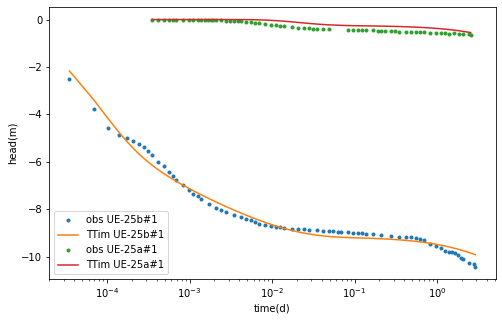

In [7]:
hm1 = ml.head(0, 0, t1)
hm2 = ml.head(110, 0, t2)
plt.figure(figsize=(8, 5))
plt.semilogx(t1, h1, '.', label='obs UE-25b#1')
plt.semilogx(t1, hm1[-1], label='TTim UE-25b#1')
plt.semilogx(t2, h2, '.', label='obs UE-25a#1')
plt.semilogx(t2, hm2[-1], label='TTim UE-25a#1')
plt.xlabel('time(d)')
plt.ylabel('head(m)')
plt.legend()
plt.savefig('C:/Users/DELL/Python Notebook/MT BE/Fig/neveda_1.eps');

Simulate parameters of both fracture and matrix:

In [8]:
ml1 = ModelMaq(kaq=[1, 1], z=[0, -400, -401, -801], c=5, Saq=[1e-3, 1e-3],\
              Sll=0, topboundary='conf', tmin=1e-5, tmax=3)
w1 = Well(ml1, xw=0, yw=0, rw=0.11, rc=0, tsandQ=[0, 3093.12], layers=1)
ml1.solve()

self.neq  1
solution complete


In [9]:
ca1 = Calibrate(ml1)
ca1.set_parameter(name='kaq0', initial=1, pmin=0)
ca1.set_parameter(name='Saq0', initial=1e-4, pmin=0)
ca1.set_parameter(name='kaq1', initial=1, pmin=0)
ca1.set_parameter(name='Saq1', initial=1e-4, pmin=0)
ca1.set_parameter(name='c1', initial=100, pmin=0)
ca1.set_parameter_by_reference(name='rc', parameter=w1.rc, initial=0, pmin=0)
ca1.series(name='UE-25b#1', x=0, y=0, t=t1, h=h1, layer=1)
ca1.series(name='UE-25a#1', x=110, y=0, t=t2, h=h2, layer=1)
ca1.fit(report=True)
display(ca1.parameters)
print('RMSE:', ca1.rmse())

...........................................................................................................................................................................................................................................................................................................................................................................................................................................
Fit succeeded.
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 424
    # data points      = 138
    # variables        = 6
    chi-square         = 3.50593034
    reduced chi-square = 0.02656008
    Akaike info crit   = -494.846092
    Bayesian info crit = -477.282570
[[Variables]]
    kaq0:  7.2084e-07 +/- 2.6714e-04 (37058.99%) (init = 1)
    Saq0:  1.4416e-04 +/- 1.4738e-05 (10.22%) (init = 0.0001)
    kaq1:  0.90900946 +/- 0.00603635 (0.66%) (init = 1)
    Saq1:  3.3885e-06 +/- 3.0026e-07 (8.86%) (init = 0.0001)
    c1:    15.5698007

,optimal,std,perc_std,pmin,pmax,initial,parray
kaq0,7.20841e-07,2.671362e-04,37059,0,inf,1,[7.208405168324106e-07]
Saq0,0.000144162,1.473768e-05,10.223,0,inf,0.0001,[0.00014416209370748945]
kaq1,0.909009,6.036350e-03,0.664058,0,inf,1,[0.9090094568168918]
Saq1,3.38847e-06,3.002560e-07,8.8611,0,inf,0.0001,[3.388472165299916e-06]
c1,15.5698,1.439930e+00,9.24822,0,inf,100,[15.569800695761781]
rc,0.108566,2.533330e-03,2.33344,0,inf,0,[0.10856639204347074]


RMSE: 0.1593903771061828


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


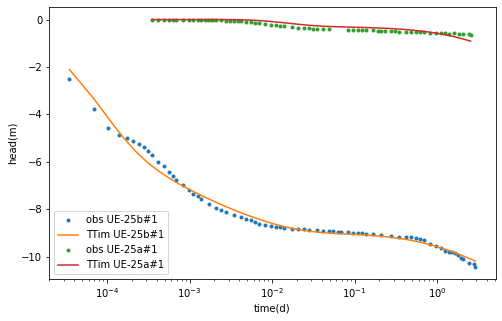

In [10]:
ht1 = ml1.head(0, 0, t1)
ht2 = ml1.head(110, 0, t2)
plt.figure(figsize=(8, 5))
plt.semilogx(t1, h1, '.', label = 'obs UE-25b#1')
plt.semilogx(t1, ht1[-1], label = 'TTim UE-25b#1')
plt.semilogx(t2, h2, '.', label = 'obs UE-25a#1')
plt.semilogx(t2, ht2[-1], label = 'TTim UE-25a#1')
plt.xlabel('time(d)')
plt.ylabel('head(m)')
plt.legend()
plt.savefig('C:/Users/DELL/Python Notebook/MT BE/Fig/neveda_2.eps');

### Summary of values simulate by different methods:

In [11]:
t = pd.DataFrame(columns=['km [m/d]', 'Sm [1/m]', 'kf [m/d]', 'Sf [1/m]', 'c', 'rc'], \
                index=['K&dR', 'Moench', 'AQTESOLV', 'MLU', 'TTim1', 'TTim2'])
t.loc['TTim2'] = ca1.parameters['optimal'].values
t.loc['K&dR'] = [0.8325, 3.750e-4, 0.8325, 4.000e-6, '-', '-']
t.loc['Moench'] = [0.1728, 3.000e-4, 0.864, 1.500e-6, '-', '-']
t.loc['AQTESOLV'] = [0.149, 5.512e-4, 0.937, 5.533e-6, '-', 0.11]
t.loc['MLU'] = [0.00025, 3.850e-04, 0.874, 8.053e-6, 12.380, 0.1]
t.iloc[4, 0:2] = [km, Sm]
t.iloc[4, 2:6] = ca.parameters['optimal'].values
t['RMSE'] = ['-', '-', 0.031736, 0.434638, ca.rmse(), ca1.rmse()]
t

,km [m/d],Sm [1/m],kf [m/d],Sf [1/m],c,rc,RMSE
K&dR,0.8325,0.000375,0.8325,4e-06,-,-,-
Moench,0.1728,0.0003,0.864,1.5e-06,-,-,-
AQTESOLV,0.149,0.0005512,0.937,5.533e-06,-,0.11,0.031736
MLU,0.00025,0.000385,0.874,8.053e-06,12.38,0.1,0.434638
TTim1,0.00025,0.000385,0.876974,5.08718e-06,13.0063,0.105604,0.199156
TTim2,7.20841e-07,0.000144162,0.909009,3.38847e-06,15.5698,0.108566,0.15939
